# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: Free-tier customers will convert to paying customers or not

#### 2. What are the predictors/covariates? 

Answer: demographic data (age, gender, location, and profession) and customer useage data

#### 3. What timeframe is this data relevent for?

Answer:Jan -Apr2015 

#### 4. What is the hypothesis?

Answer: days since last log in is positively related to coverstion

## Let's get started with our dataset

#### 1. Create a data dictionary 

In [34]:
import pandas as pd

admissions = {'admit': ['0 = not admit, 1 = admit', 'categorical'],
              'gre score': ['GRE score', 'continuous'],
              'gpa': ['Grade Point Average', 'continuous'],
              'prestige': ['rank of alma mater (1 = highest, 4=lowest)', 'categorical']
             }

df = pd.DataFrame.from_dict(admissions, orient='index').reset_index() #Makes it a Data Frame
df.columns = ['Variable', 'Description', 'Type of Variable'] #Gives the Dataframe column names
df.sort_values('Type of Variable').reset_index(drop=True) #Displays the dataframe


,Variable,Description,Type of Variable
0,admit,"0 = not admit, 1 = admit",categorical
1,prestige,"rank of alma mater (1 = highest, 4=lowest)",categorical
2,gpa,Grade Point Average,continuous
3,gre score,GRE score,continuous


We would like to explore the association between X and Y 

#### 2. What is the outcome?

Answer: Admit

#### 3. What are the predictors/covariates? 

Answer: GRE, GPA, rank

#### 4. What timeframe is this data relevent for?

Answer: There is none.

#### 4. What is the hypothesis?

Answer: Students that score higher on the GRE are more likely to be admitted than those that score lower on the GRE.

    Using the above information, write a well-formed problem statement. 


## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: The determine whether there is a correlation between GRE score/GPA/prestige and admittance.

#### 2a. What are the assumptions of the distribution of data? 

Answer: 
1) There is no time frame for this data set so we have to assume that the data collected was collected for the same time range.
2) The methods for GPA scoring is similar across applicant schools and is the under or over reported by schools.
3) The scoring for GRE is similar for all applicants and test did not change greatly for applicants.
4) The ranking for alma mater is unbiased and not being under or over reported. 


#### 2b. How will determine the distribution of your data? 

Answer: Use the describe function to see what your mean, median, mode, min, max, std, and IQRs. You can also see the skew and kurtosis of your data.

In [38]:
#General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [53]:
admissions = pd.read_csv("admissions.csv")
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [40]:
admissions.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [73]:
admissions.skew()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

In [72]:
admissions.kurtosis()

admit      -1.387513
gre        -0.330065
gpa        -0.574623
prestige   -0.894759
dtype: float64

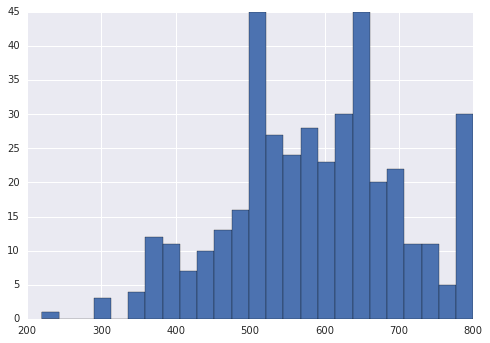

In [115]:
plt.hist(admissions.gre.dropna(), bins=25)
plt.show()

#### 3a. How might outliers impact your analysis? 

Answer: Outliers may skew the data and mispresent the usage distribution of the users such as the mean and range towards the outlier value. 

#### 3b. How will you test for outliers? 

Answer: Outliers will have values smaller than the lower inner fence Q1 - 1.5IQR and values that are larger than the upper fence Q3 + 1.5IQR. You can use a box plot to see if there are outliers as well.

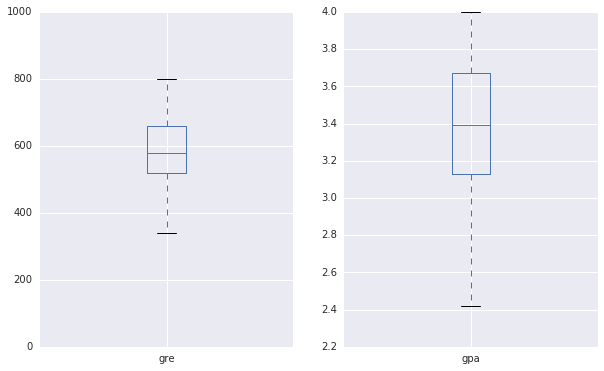

In [132]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

admissions.gre.plot(kind="box", ax=axs[0])
axs[0].set_ylim([0, 1000])

admissions.gpa.plot(kind="box", ax=axs[1])

#### 4a. What is colinearity? 

Answer: Collinearity is a linear association between two variables. Two variables are perfectly collinear if there is an exact linear relationship between them. 

#### 4b. How will you test for colinearity? 

Answer: Plot two variables and see if the two are highly correlated.

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


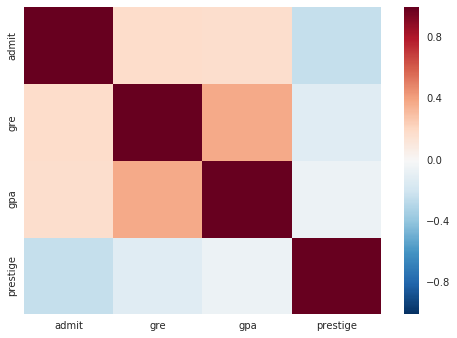

In [136]:
sns.heatmap(admissions.corr())
admissions.corr()

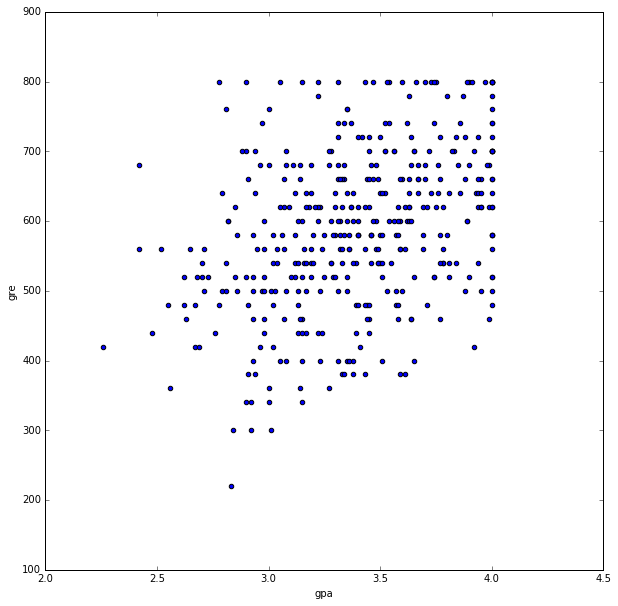

In [70]:
admissions.plot(x='gpa',
                y='gre',
                kind="scatter",
              figsize=(10,10))

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 


1) Determine whether the predictors are or are not correlated with the outcome. In this example, conclude if GRE scores/GPA/prestige correlate to admittance. 
2) Collect the necessary datapoints to determine whether there is a correlation between GRE score and admittance. Create a data dictionary with these variables with their appropriate data type. Look at the distribution of data and see if it's normal using the describe function to see mean, median, mode, IQR, std and various plots such as scatter or box plot to see if there are any skews or outliers that may need to be addressed. Since we do not have a time frame available, does the data looked skewed that it suggests it's not a representative random sample. 
3) Explore data points more deeply. For example, how is prestige determined and are there any outliers, are there any missing GRE or GPA scores that need to be cleaned up?
4) Build a logistic regression

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model